# Adaptability
- add description

Hyperparams: (64, 64), ReLU acitvations

In [44]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import auc

In [45]:
f = open('../../GROUP_013/results/2022-04-25_21h08m33/log.txt')
rewards_05g = f.readlines()
f.close()
f = open('../../GROUP_013/results/2022-04-26_10h19m50/log.json')
sample_efficiency_05g = f.readlines()
f.close()

In [46]:
rewards_05g = [reward for reward in rewards_05g if 'acc_reward:' in reward]
rewards_05g = np.array([float(reward.split("acc_reward: ", 1)[1][:-2])  for reward in rewards_05g])[0:150]

In [65]:
#auc_performances = []
sample_efficiencies = []
for i in range(1, 6):
    s = sample_efficiency_05g[i].split("list_of_rewards", 1)[1][4:-3].split(",")
    s = np.array([float(ss) for ss in s])
    sample_efficiencies.append(s)
#    auc_performances.append(auc(range(len(s)), s))
print(f'Final Performance: {np.max(rewards_05g)}')
print(f'Cumulative Training Reward: {np.sum(rewards_05g)}')
#print(f'Sample Efficiency: {np.mean(np.array(auc_performances))}')
print(f'Sample Efficiency: {np.mean(np.array(sample_efficiencies))}')

Final Performance: 3144.3
Cumulative Training Reward: 269584.7
Sample Efficiency: 962.4098003411149


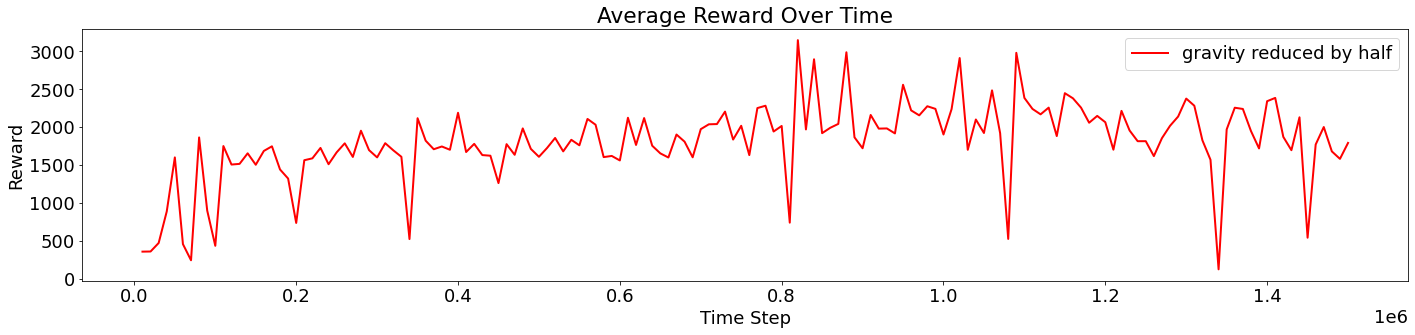

In [48]:
font = {'family' : 'sans serif', 'size' : 18}
matplotlib.rc('font', **font)

_ = plt.figure(figsize=(20, 5))

plt.plot(np.arange(1, 151)*10000, rewards_05g, color = 'r', linewidth=2.0, label='gravity reduced by half')

plt.ylabel("Reward")
plt.xlabel("Time Step")
plt.title("Average Reward Over Time")
plt.legend()
plt.tight_layout()
plt.savefig('adaptability_rewards.png', bbox_inches="tight")
plt.show()